In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Simple Linear Regression with Synthetic Data

The following code defines two functions:

build_model(my_learning_rate), which builds an empty model.
train_model(model, feature, label, epochs), which trains the model from the examples (feature and label) you pass.
Since you don't need to understand model building code right now, we've hidden this code cell. You may optionally double-click the headline to explore this code.

In [2]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


# Define plotting functions

We're using a popular Python library called Matplotlib to create the following two plots:

a plot of the feature values vs. the label values, and a line showing the output of the trained model.
a loss curve.

In [3]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()
print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/10
1/1 [==============================] - 0s 336ms/step - loss: 888.9012 - root_mean_squared_error: 29.8144
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 873.4126 - root_mean_squared_error: 29.5536
Epoch 3/10
1/1 [==============================] - 0s 0s/step - loss: 862.3079 - root_mean_squared_error: 29.3651
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 853.0876 - root_mean_squared_error: 29.2077
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 844.9597 - root_mean_squared_error: 29.0682
Epoch 6/10
1/1 [==============================] - 0s 0s/step - loss: 837.5568 - root_mean_squared_error: 28.9406
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 830.6750 - root_mean_squared_error: 28.8214
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 824.1868 - root_mean_squared_error: 28.7087
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 818.0075 - root_me

C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


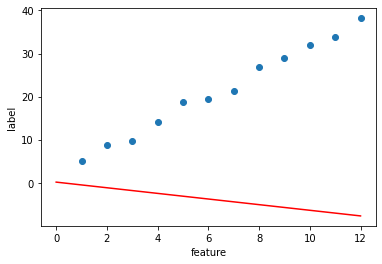

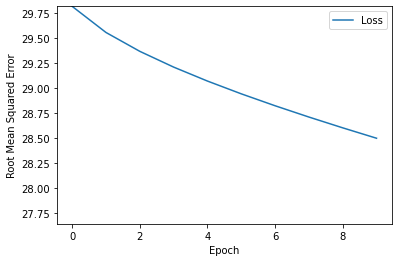

In [4]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,my_label, epochs,my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Task 2: Increase the number of epochs
Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has converged.

In Task 1, the training loss did not converge. One possible solution is to train for more epochs. Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

It is converging as epoch = 450

(assign 450 to epoch for answer)

Task 3: Increase the learning rate
In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/500
1/1 [==============================] - 0s 313ms/step - loss: 271.6552 - root_mean_squared_error: 16.4820
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 6731012.0000 - root_mean_squared_error: 2594.4194
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 270.0974 - root_mean_squared_error: 16.4346
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 1.8755 - root_mean_squared_error: 1.3695
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 0.8959 - root_mean_squared_error: 0.9465
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 0.8820 - root_mean_squared_error: 0.9392
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 0.8812 - root_mean_squared_error: 0.9387
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 0.8808 - root_mean_squared_error: 0.9385
Epoch 9/500
1/1 [==============================] - 0s 15ms/step - loss: 0.8804 - root_m

1/1 [==============================] - 0s 8ms/step - loss: 162102.6875 - root_mean_squared_error: 402.6198
Epoch 72/500
1/1 [==============================] - 0s 0s/step - loss: 124532.5234 - root_mean_squared_error: 352.8917
Epoch 73/500
1/1 [==============================] - 0s 8ms/step - loss: 103325.1016 - root_mean_squared_error: 321.4422
Epoch 74/500
1/1 [==============================] - 0s 8ms/step - loss: 94240.5000 - root_mean_squared_error: 306.9861
Epoch 75/500
1/1 [==============================] - 0s 8ms/step - loss: 94773.4062 - root_mean_squared_error: 307.8529
Epoch 76/500
1/1 [==============================] - 0s 0s/step - loss: 104217.5547 - root_mean_squared_error: 322.8274
Epoch 77/500
1/1 [==============================] - 0s 8ms/step - loss: 122996.4609 - root_mean_squared_error: 350.7085
Epoch 78/500
1/1 [==============================] - 0s 8ms/step - loss: 151303.0156 - root_mean_squared_error: 388.9769
Epoch 79/500
1/1 [==============================] - 0s 0s

1/1 [==============================] - 0s 0s/step - loss: 171456.3906 - root_mean_squared_error: 414.0729
Epoch 140/500
1/1 [==============================] - 0s 0s/step - loss: 170045.7656 - root_mean_squared_error: 412.3661
Epoch 141/500
1/1 [==============================] - 0s 8ms/step - loss: 168859.5781 - root_mean_squared_error: 410.9253
Epoch 142/500
1/1 [==============================] - 0s 8ms/step - loss: 168105.6562 - root_mean_squared_error: 410.0069
Epoch 143/500
1/1 [==============================] - 0s 8ms/step - loss: 167884.5781 - root_mean_squared_error: 409.7372
Epoch 144/500
1/1 [==============================] - 0s 0s/step - loss: 168185.0000 - root_mean_squared_error: 410.1036
Epoch 145/500
1/1 [==============================] - 0s 0s/step - loss: 168898.1875 - root_mean_squared_error: 410.9723
Epoch 146/500
1/1 [==============================] - 0s 0s/step - loss: 169845.5156 - root_mean_squared_error: 412.1232
Epoch 147/500
1/1 [==============================] 

1/1 [==============================] - 0s 8ms/step - loss: 170456.7656 - root_mean_squared_error: 412.8641
Epoch 208/500
1/1 [==============================] - 0s 0s/step - loss: 170417.8594 - root_mean_squared_error: 412.8170
Epoch 209/500
1/1 [==============================] - 0s 8ms/step - loss: 170382.8594 - root_mean_squared_error: 412.7746
Epoch 210/500
1/1 [==============================] - 0s 8ms/step - loss: 170358.1875 - root_mean_squared_error: 412.7447
Epoch 211/500
1/1 [==============================] - 0s 8ms/step - loss: 170347.8281 - root_mean_squared_error: 412.7321
Epoch 212/500
1/1 [==============================] - 0s 0s/step - loss: 170352.5000 - root_mean_squared_error: 412.7378
Epoch 213/500
1/1 [==============================] - 0s 8ms/step - loss: 170369.7500 - root_mean_squared_error: 412.7587
Epoch 214/500
1/1 [==============================] - 0s 8ms/step - loss: 170394.8125 - root_mean_squared_error: 412.7891
Epoch 215/500
1/1 [=============================

1/1 [==============================] - 0s 0s/step - loss: 170418.8906 - root_mean_squared_error: 412.8182
Epoch 276/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.8750 - root_mean_squared_error: 412.8170
Epoch 277/500
1/1 [==============================] - 0s 0s/step - loss: 170416.9531 - root_mean_squared_error: 412.8159
Epoch 278/500
1/1 [==============================] - 0s 0s/step - loss: 170416.2500 - root_mean_squared_error: 412.8150
Epoch 279/500
1/1 [==============================] - 0s 0s/step - loss: 170415.8125 - root_mean_squared_error: 412.8145
Epoch 280/500
1/1 [==============================] - 0s 0s/step - loss: 170415.7969 - root_mean_squared_error: 412.8145
Epoch 281/500
1/1 [==============================] - 0s 8ms/step - loss: 170416.1250 - root_mean_squared_error: 412.8149
Epoch 282/500
1/1 [==============================] - 0s 8ms/step - loss: 170416.6719 - root_mean_squared_error: 412.8156
Epoch 283/500
1/1 [==============================] 

1/1 [==============================] - 0s 8ms/step - loss: 170417.6094 - root_mean_squared_error: 412.8167
Epoch 344/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.5156 - root_mean_squared_error: 412.8166
Epoch 345/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.5156 - root_mean_squared_error: 412.8166
Epoch 346/500
1/1 [==============================] - 0s 0s/step - loss: 170417.4062 - root_mean_squared_error: 412.8164
Epoch 347/500
1/1 [==============================] - 0s 0s/step - loss: 170417.3594 - root_mean_squared_error: 412.8164
Epoch 348/500
1/1 [==============================] - 0s 0s/step - loss: 170417.2656 - root_mean_squared_error: 412.8163
Epoch 349/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.3594 - root_mean_squared_error: 412.8164
Epoch 350/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 351/500
1/1 [==============================

1/1 [==============================] - 0s 0s/step - loss: 170417.6094 - root_mean_squared_error: 412.8167
Epoch 412/500
1/1 [==============================] - 0s 0s/step - loss: 170417.5469 - root_mean_squared_error: 412.8166
Epoch 413/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 414/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.5156 - root_mean_squared_error: 412.8166
Epoch 415/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.6094 - root_mean_squared_error: 412.8167
Epoch 416/500
1/1 [==============================] - 0s 0s/step - loss: 170417.7188 - root_mean_squared_error: 412.8168
Epoch 417/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.6719 - root_mean_squared_error: 412.8167
Epoch 418/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.6406 - root_mean_squared_error: 412.8167
Epoch 419/500
1/1 [==============================

Epoch 479/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 480/500
1/1 [==============================] - 0s 0s/step - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 481/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 482/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 483/500
1/1 [==============================] - 0s 8ms/step - loss: 170417.4375 - root_mean_squared_error: 412.8165
Epoch 484/500
1/1 [==============================] - 0s 0s/step - loss: 170417.4844 - root_mean_squared_error: 412.8165
Epoch 485/500
1/1 [==============================] - 0s 0s/step - loss: 170417.5000 - root_mean_squared_error: 412.8166
Epoch 486/500
1/1 [==============================] - 0s 0s/step - loss: 170417.4531 - root_mean_squared_error: 412.8165
Epoch 487/500
1/1 [=================

C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


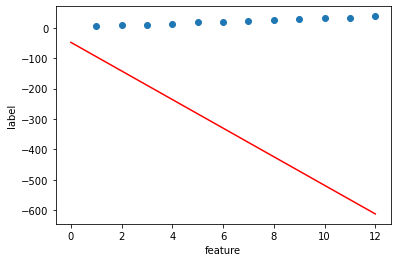

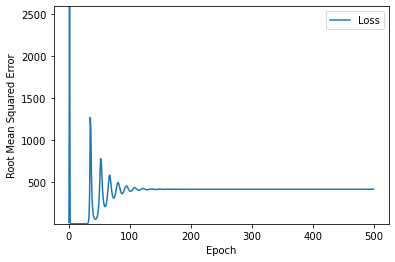

In [5]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a roller coaster. An oscillating loss curve strongly suggests that the learning rate is too high.

Task 4: Find the ideal combination of epochs and learning rate
Assign values to the following two hyperparameters to make training converge as efficiently as possible:

learning_rate
epochs

C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/70
1/1 [==============================] - 0s 329ms/step - loss: 163.8764 - root_mean_squared_error: 12.8014
Epoch 2/70
1/1 [==============================] - 0s 0s/step - loss: 83.9285 - root_mean_squared_error: 9.1613
Epoch 3/70
1/1 [==============================] - 0s 8ms/step - loss: 48.7285 - root_mean_squared_error: 6.9806
Epoch 4/70
1/1 [==============================] - 0s 8ms/step - loss: 29.3442 - root_mean_squared_error: 5.4170
Epoch 5/70
1/1 [==============================] - 0s 0s/step - loss: 17.8839 - root_mean_squared_error: 4.2289
Epoch 6/70
1/1 [==============================] - 0s 8ms/step - loss: 10.9466 - root_mean_squared_error: 3.3086
Epoch 7/70
1/1 [==============================] - 0s 8ms/step - loss: 6.7421 - root_mean_squared_error: 2.5966
Epoch 8/70
1/1 [==============================] - 0s 0s/step - loss: 4.2243 - root_mean_squared_error: 2.0553
Epoch 9/70
1/1 [==============================] - 0s 0s/step - loss: 2.7476 - root_mean_squared_error: 1.

C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


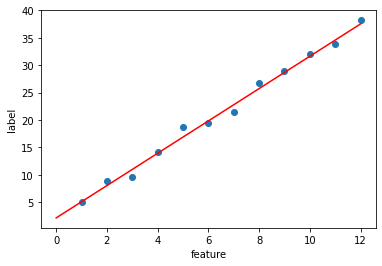

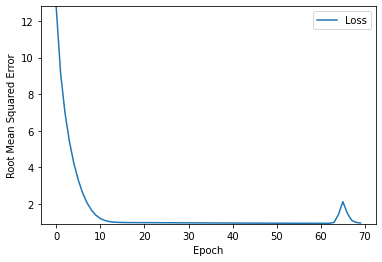

In [6]:
# Set the learning rate and number of epochs
learning_rate= 0.14  # Replace ? with a floating-point number
epochs= 70   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Task 5: Adjust the batch size
The system recalculates the model's loss value and adjusts the model's weights and bias after each iteration. Each iteration is the span in which the system processes one batch. For example, if the batch size is 6, then the system recalculates the model's loss value and adjusts the model's weights and bias after processing every 6 examples.

One epoch spans sufficient iterations to process every example in the dataset. For example, if the batch size is 12, then each epoch lasts one iteration. However, if the batch size is 6, then each epoch consumes two iterations.

It is tempting to simply set the batch size to the number of examples in the dataset (12, in this case). However, the model might actually train faster on smaller batches. Conversely, very small batches might not contain enough information to help the model converge.

Experiment with batch_size in the following code cell. What's the smallest integer you can set for batch_size and still have the model converge in a hundred epochs?

In [14]:
learning_rate=0.05
epochs=100
my_batch_size= 1  # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

TypeError: train_model() missing 1 required positional argument: 'batch_size'

# Linear Regression with Real Dataset

In [8]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [9]:
data_set = pd.read_csv("california_housing_train.csv")

#Scaling the label (not essential just for know how)
data_set["median_house_value"] /= 1000.0 

data_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


Examine the dataset
A large part of most machine learning projects is getting to know your data. The pandas API provides a describe function that outputs the following statistics about every column in the DataFrame:

count, which is the number of rows in that column. Ideally, count contains the same value for every column.

mean and std, which contain the mean and standard deviation of the values in each column.

min and max, which contain the lowest and highest values in each column.

25%, 50%, 75%, which contain various quantiles.

In [10]:
data_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


Task 1: Identify anomalies in the dataset
Do you see any anomalies (strange values) in the data?# 

In [11]:
#@title Double-click to view a possible answer.

# The maximum value (max) of several columns seems very
# high compared to the other quantiles. For example,
# example the total_rooms column. Given the quantile
# values (25%, 50%, and 75%), you might expect the 
# max value of total_rooms to be approximately 
# 5,000 or possibly 10,000. However, the max value 
# is actually 37,937.

# When you see anomalies in a column, become more careful
# about using that column as a feature. That said,
# anomalies in potential features sometimes mirror 
# anomalies in the label, which could make the column 
# be (or seem to be) a powerful feature.
# Also, as you will see later in the course, you 
# might be able to represent (pre-process) raw data 
# in order to make columns into useful features.

Call the model functions
An important part of machine learning is determining which features correlate with the label. For example, real-life home-value prediction models typically rely on hundreds of features and synthetic features. However, this model relies on only one feature. For now, you'll arbitrarily use total_rooms as that feature.

In [16]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [19]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = data_set.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/30
567/567 [==============================] - 1s 875us/step - loss: 1010329.1250 - root_mean_squared_error: 1005.1513
Epoch 2/30
567/567 [==============================] - 0s 878us/step - loss: 28043.5938 - root_mean_squared_error: 167.4622
Epoch 3/30
567/567 [==============================] - 0s 878us/step - loss: 27616.8262 - root_mean_squared_error: 166.1831
Epoch 4/30
567/567 [==============================] - 0s 847us/step - loss: 26594.3672 - root_mean_squared_error: 163.0778
Epoch 5/30
567/567 [==============================] - 0s 872us/step - loss: 25836.9434 - root_mean_squared_error: 160.7387
Epoch 6/30
567/567 [==============================] - 1s 894us/step - loss: 25236.3223 - root_mean_squared_error: 158.8594
Epoch 7/30
567/567 [==============================] - 0s 879us/step - loss: 24712.4043 - root_mean_squared_error: 157.2018
Epoch 8/30
567/567 [==============================] - 0s 881us/step - loss: 24000.8535 - root_mean_squared_error: 154.9221
Epoch 9/30
56

C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


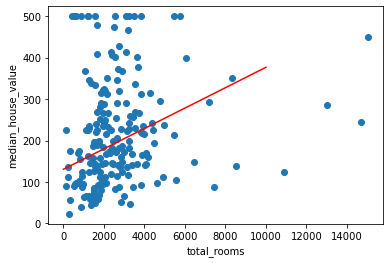

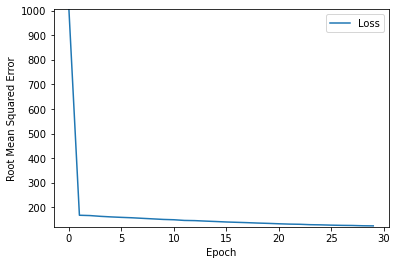

In [20]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, data_set,my_feature, my_label,epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Use the model to make predictions
You can use the trained model to make predictions. In practice, you should make predictions on examples that are not used in training. However, for this exercise, you'll just work with a subset of the same training dataset. A later Colab exercise will explore ways to make predictions on examples not used in training.

In [31]:
def predict_house_values(n, features, label):
    #predict house values based on the feature
    
    batch = data_set[features][10000:10000 + n]
    predicted_values = my_model.predict_on_batch(batch)
    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    print("--------------------------------------")
    
    for i in range(n):
        print(data_set[features][10000+i],"    ",data_set[label][10000 + i],"        ",predicted_values[i][0])
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
1960.0      53.0          178.92395
3400.0      92.5          214.39151
3677.0      69.1          221.2141
2202.0      62.0          184.88448
2403.0      80.0          189.83516
5652.0      295.3          269.85883
3318.0      500.001          212.37183
2552.0      342.5          193.50507
1364.0      117.6          164.24432
3468.0      128.3          216.06638


In [ ]:
#@title Double-click to view the answer.

# Most of the predicted values differ significantly
# from the label value, so the trained model probably 
# doesn't have much predictive power. However, the
# first 10 examples might not be representative of 
# the rest of the examples.  

Task 3: Try a different feature
The total_rooms feature had only a little predictive power. Would a different feature have greater predictive power? Try using population as the feature instead of total_rooms.

Note: When you change features, you might also need to change the hyperparameters.

C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/18
5667/5667 [==============================] - 5s 907us/step - loss: 29446.4727 - root_mean_squared_error: 171.5997
Epoch 2/18
5667/5667 [==============================] - 5s 797us/step - loss: 19695.1680 - root_mean_squared_error: 140.3395
Epoch 3/18
5667/5667 [==============================] - 5s 809us/step - loss: 18014.2402 - root_mean_squared_error: 134.2171
Epoch 4/18
5667/5667 [==============================] - 5s 930us/step - loss: 17903.5723 - root_mean_squared_error: 133.8042
Epoch 5/18
5667/5667 [==============================] - 6s 1ms/step - loss: 18015.7812 - root_mean_squared_error: 134.2229
Epoch 6/18
5667/5667 [==============================] - 5s 934us/step - loss: 18230.2949 - root_mean_squared_error: 135.0196
Epoch 7/18
5667/5667 [==============================] - 5s 853us/step - loss: 18076.3145 - root_mean_squared_error: 134.4482
Epoch 8/18
5667/5667 [==============================] - 5s 862us/step - loss: 18120.8398 - root_mean_squared_error: 134.6137
Ep

C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


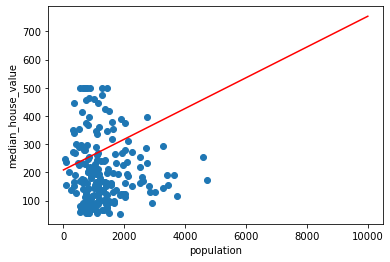

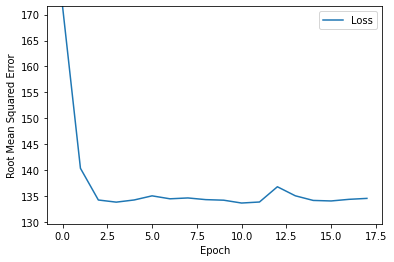

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
1286.0      53.0          278.7449
1867.0      92.5          310.43292
2191.0      69.1          328.10403
1052.0      62.0          265.98242
1647.0      80.0          298.43402
2312.0      295.3          334.70343
1604.0      500.001          296.08878
1066.0      342.5          266.746
338.0      117.6          227.04053
1604.0      128.3          296.08878
1200.0      187.3          274.0544
292.0      79.5          224.53166
2014.0      111.9          318.45038
1817.0      95.2          307.7059
1328.0      69.3          281.03558


In [33]:
my_feature = "population"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, data_set, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

In [ ]:
# Training is not entirely deterministic, but population 
# typically converges at a slightly higher RMSE than 
# total_rooms.  So, population appears to be about 
# the same or slightly worse at making predictions 
# than total_rooms.

Task 4: Define a synthetic feature
You have determined that total_rooms and population were not useful features. That is, neither the total number of rooms in a neighborhood nor the neighborhood's population successfully predicted the median house price of that neighborhood. Perhaps though, the ratio of total_rooms to population might have some predictive power. That is, perhaps block density relates to median house value.

Epoch 1/24
567/567 [==============================] - 1s 898us/step - loss: 39181.9336 - root_mean_squared_error: 197.9443
Epoch 2/24
567/567 [==============================] - 0s 883us/step - loss: 19263.2910 - root_mean_squared_error: 138.7923
Epoch 3/24
567/567 [==============================] - 0s 866us/step - loss: 15054.9932 - root_mean_squared_error: 122.6988
Epoch 4/24
567/567 [==============================] - 0s 877us/step - loss: 14785.7637 - root_mean_squared_error: 121.5967
Epoch 5/24
567/567 [==============================] - 0s 869us/step - loss: 14616.7637 - root_mean_squared_error: 120.8998
Epoch 6/24
567/567 [==============================] - 0s 877us/step - loss: 14431.5781 - root_mean_squared_error: 120.1315
Epoch 7/24
567/567 [==============================] - 1s 933us/step - loss: 14308.4434 - root_mean_squared_error: 119.6179
Epoch 8/24
567/567 [==============================] - 1s 885us/step - loss: 14140.0391 - root_mean_squared_error: 118.9119
Epoch 9/24
567/5

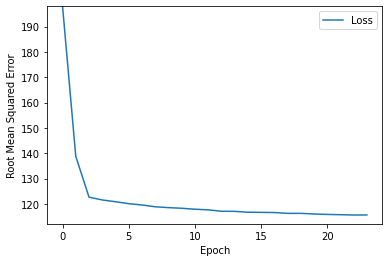

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
1.5241057542768273      53.0          187.25096
1.821103374397429      92.5          198.76974
1.6782291191236878      69.1          193.22849
2.093155893536122      62.0          209.32104
1.459016393442623      80.0          184.72653
2.444636678200692      295.3          222.9529
2.06857855361596      500.001          208.36783
2.3939962476547842      342.5          220.98886
4.035502958579881      117.6          284.6532
2.162094763092269      128.3          211.99478
2.4183333333333334      187.3          221.93274
2.6780821917808217      79.5          232.00687
2.4364448857994043      111.9          222.6352
2.291689598238855      95.2          217.021
2.0737951807228914      69.3          208.57016


In [36]:
#@title Double-click to view a possible solution to Task 4.

# Define a synthetic feature
data_set["rooms_per_person"] = data_set["total_rooms"] / data_set["population"]
my_feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, data_set,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)


# Task 5. Find feature(s) whose raw values correlate with the label
So far, we've relied on trial-and-error to identify possible features for the model. Let's rely on statistics instead.

A correlation matrix indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

1.0: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
-1.0: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
0.0: no correlation; the two columns are not linearly related.
In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

The following code cell generates the correlation matrix for attributes of the California Housing Dataset:

In [37]:
# Generate a correlation matrix.
data_set.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


The correlation matrix shows nine potential features (including a synthetic feature) and one label (median_house_value). A strong negative correlation or strong positive correlation with the label suggests a potentially good feature.

Your Task: Determine which of the nine potential features appears to be the best candidate for a feature?

In [ ]:
#@title Double-click here for the solution to Task 5

# The `median_income` correlates 0.7 with the label 
# (median_house_value), so median_income` might be a 
# good feature. The other seven potential features
# all have a correlation relatively close to 0. 

# If time permits, try median_income as the feature
# and see whether the model improves.